In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
from IPython.display import display
%matplotlib inline

### 線形モデルによる回帰

w[0]: 0.393906  b: -0.031804


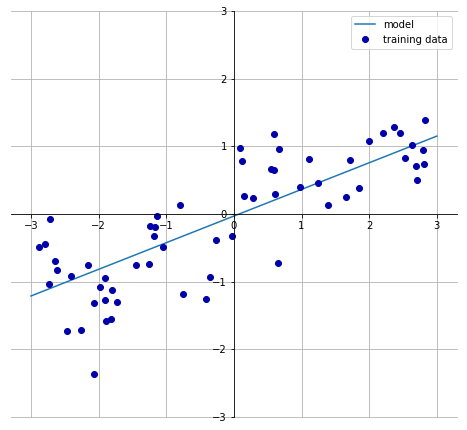

In [2]:
mglearn.plots.plot_linear_regression_wave()

### 線形回帰(通常最小二乗法)
- 訓練データにおいて、予測と真の回帰ターゲットyとの平均二乗誤差が最小になるように、パラメータwとbを求める
- 平均二乗誤差は予測と真の値との差を二乗したものの平均値
- 線形回帰にはパラメータはない
- パラメータがないということは、モデルの複雑さを制御する方法がないということ

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [4]:
lr = LinearRegression().fit(X_train, y_train)

In [6]:
# 傾きを表すパラメータ: 重み、係数
lr.coef_

array([ 0.39390555])

In [7]:
# 切片
lr.intercept_

-0.031804343026759746

In [8]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


In [9]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [11]:
lr = LinearRegression().fit(X_train, y_train)

In [12]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


- 訓練セットとテストセットで性能が大きく異なるのは、過剰適合が起きている証拠

### リッジ回帰

In [13]:
from sklearn.linear_model import Ridge

In [14]:
ridge = Ridge().fit(X_train, y_train)

In [15]:
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))

Training set score: 0.89


In [16]:
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Test set score: 0.75


In [19]:
# パラメータ指定(10)
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set socre: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set socre: 0.79
Test set score: 0.64


- 訓練セットに対する精度は下がるが、汎化には良いかもしれない

In [20]:
# パラメータ指定(0.1)
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


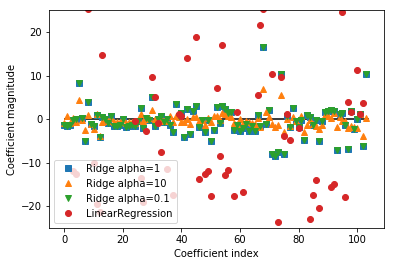

In [23]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend(loc=3)

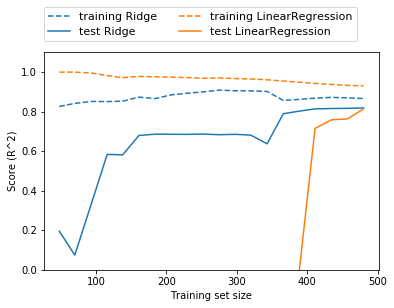

In [24]:
mglearn.plots.plot_ridge_n_samples()